In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Single Gram (n=1)

In [ ]:
v = CountVectorizer()
v.fit(["'This document is the second document.'"])
v.vocabulary_

# Bi-Gram (n=2)

In [4]:
v = CountVectorizer(ngram_range=(2,2))
v.fit(["'This document is the second document.'"])
v.vocabulary_

{'this document': 4,
 'document is': 0,
 'is the': 1,
 'the second': 3,
 'second document': 2}

# Single gram and BiGram (n=1 and n=2)

In [5]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(["'This document is the second document.'"])
v.vocabulary_

{'this': 8,
 'document': 0,
 'is': 2,
 'the': 6,
 'second': 4,
 'this document': 9,
 'document is': 1,
 'is the': 3,
 'the second': 7,
 'second document': 5}

# Single gram, Bigram and TriGram (n=1 , n=2 and n=3)

In [6]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["'This document is the second document.'"])
v.vocabulary_

{'this': 11,
 'document': 0,
 'is': 3,
 'the': 8,
 'second': 6,
 'this document': 12,
 'document is': 1,
 'is the': 4,
 'the second': 9,
 'second document': 7,
 'this document is': 13,
 'document is the': 2,
 'is the second': 5,
 'the second document': 10}

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    """
    remove stop words and punctuations
    Return : sentence with base words from LEMMA_
    """
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [15]:
corpus = [
'This is the first document.',
'This document is the second document.',
'And this is the third one.',
'Is this the first document?',
]

In [16]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['document', 'document second document', '', 'document']

In [17]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [18]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [19]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [21]:
### convert word corpus into sparse-vector (or call it -python array)
v.transform(["Thor eat pizza"])

<1x9 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

# OUT Of VOCABULARY Problem(OVV)

In [24]:

v.transform(["HULK eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

# MODEL

Using bag of n-grams, train machine learning model that can categorize any news into one of the following categories,

* BUSINESS
* SPORTS
* CRIME
* SCIENCE

Dataset
Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

This data consists of two columns.
  - Text (Text is a news article)
  - Category (Category can be : 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE')




In [43]:
import pandas as pd
import numpy as np
import spacy 

In [44]:
df = pd.read_json("dataset/News_Category_Dataset.json")

In [45]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [46]:
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [47]:
### handle the imbalanced dataset

### use undersampling  for this excercise:

min_samples = 1381

df_business= df[df.category=="BUSINESS"].sample(min_samples, random_state=42)
df_sports= df[df.category=="SPORTS"].sample(min_samples, random_state=42)
df_crime= df[df.category=="CRIME"].sample(min_samples, random_state=42)
df_science= df[df.category=="SCIENCE"].sample(min_samples, random_state=42)

In [48]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science], axis=0)
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [49]:
df_balanced["label"] = df_balanced.category.map(
    {"BUSINESS":0, 
     "SPORTS":1,
     "CRIME":2, 
     "SCIENCE":3}
)

In [58]:
df_balanced["label"].unique()

array([0, 1, 2, 3], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split

X = df_balanced["text"]
y =df_balanced["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [64]:
print(X_train.shape)

(4419,)


In [65]:
print(y_train.value_counts())

0    1105
3    1105
1    1105
2    1104
Name: label, dtype: int64


              precision    recall  f1-score   support

           0       0.78      0.92      0.84       276
           1       0.92      0.85      0.88       276
           2       0.91      0.89      0.90       277
           3       0.89      0.82      0.85       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105

training score.... 0.9626612355736592
test score.... 0.869683257918552


C:\Users\sd991188\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


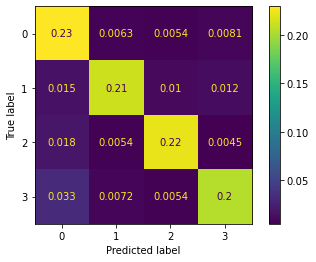

In [74]:
### Build bag of words model

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, plot_confusion_matrix


clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('multiNB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test,normalize='all') 
plt.show()

# n=1 and n=2 , multi-gram model

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       276
           1       0.92      0.83      0.87       276
           2       0.91      0.88      0.89       277
           3       0.93      0.79      0.85       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105

training score.... 0.9959266802443992
test score.... 0.8588235294117647


C:\Users\sd991188\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


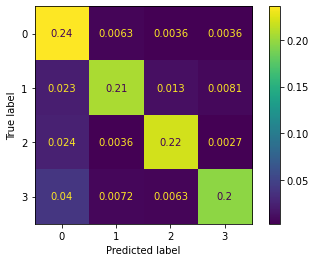

In [75]:
### Build bag of words model 

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
import matplotlib.pyplot as plt

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('multiNB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test,normalize='all') 
plt.show()

In [76]:
### check predictions, manually

X_test[:5]

12446    Shocking Video Of Officer Punching Woman Ignit...
3868     YOLO ATTACK: Birthday Stabbing Turns Party Int...
3301                             Great News For Obamacare 
11543    Katie Nolan Calls On Dallas Cowboys To Get Hel...
9501     Markets Tumble On Fears Of Global Economic Slo...
Name: text, dtype: object

In [77]:
y_test[:5]

12446    2
3868     2
3301     0
11543    1
9501     0
Name: label, dtype: int64

In [78]:
y_pred[:5]

array([2, 2, 0, 1, 0], dtype=int64)

# BUILD Model with PRE-PROCESSING

In [80]:
import pandas as pd
import numpy as np
import spacy 

In [81]:
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    """
    remove stop words and punctuations
    Return : sentence with base words from LEMMA_
    """
    doc = nlp(text)
    filtered_tokens = []
    
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [82]:
df = pd.read_json("dataset/News_Category_Dataset.json")

In [84]:
### use undersampling  for this excercise:

min_samples = 1381

df_business= df[df.category=="BUSINESS"].sample(min_samples, random_state=42)
df_sports= df[df.category=="SPORTS"].sample(min_samples, random_state=42)
df_crime= df[df.category=="CRIME"].sample(min_samples, random_state=42)
df_science= df[df.category=="SCIENCE"].sample(min_samples, random_state=42)

In [85]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science], axis=0)
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [86]:
df_balanced["label"] = df_balanced.category.map(
    {"BUSINESS":0, 
     "SPORTS":1,
     "CRIME":2, 
     "SCIENCE":3}
)

In [87]:
df_balanced.head()

,text,category,label
594,How to Develop the Next Generation of Innovato...,BUSINESS,0
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0


In [88]:
df_balanced['preprocessed_text']=df_balanced.text.apply(preprocess)

In [89]:
df_balanced.head()

,text,category,label,preprocessed_text
594,How to Develop the Next Generation of Innovato...,BUSINESS,0,develop Generation Innovators stop treat way g...
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0,Madoff Victims Payout Nears $ 7.2 billion Trus...
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0,Bay Area Floats Sanctuary Transit Policy prote...
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0,Microsoft Agrees acquire LinkedIn $ 26.2 billi...
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0,inside Legal Multibillion Dollar Weed Market


In [90]:
df_balanced.category.value_counts()

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       276
           1       0.91      0.87      0.89       276
           2       0.90      0.94      0.92       277
           3       0.92      0.82      0.87       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105

training score.... 0.9945689069925322
test score.... 0.8886877828054298


C:\Users\sd991188\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


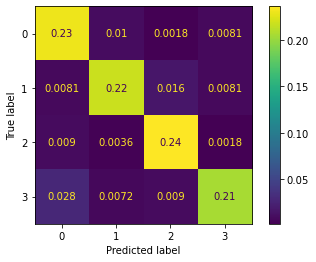

In [91]:
### Build bag of words model 

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = df_balanced["preprocessed_text"]
y =df_balanced["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range=(1,2))),
    ('multiNB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred,))
print('training score....', accuracy_score(y_train, clf.predict(X_train)))
print('test score....', accuracy_score(y_test, y_pred))

plot_confusion_matrix(clf, X_test, y_test,normalize='all') 
plt.show()

In [92]:
### plot confusion matrix thorugh seaborn heatmap

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[254,  11,   2,   9],
       [  9, 240,  18,   9],
       [ 10,   4, 261,   2],
       [ 31,   8,  10, 227]], dtype=int64)

Text(69.0, 0.5, 'actual')

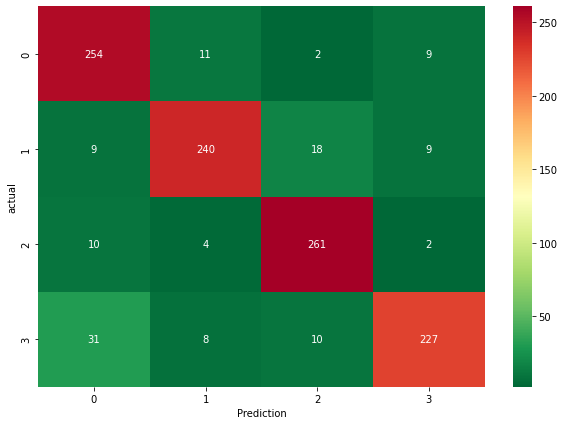

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap=plt.cm.RdYlGn_r, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('actual')